## 1. LU factorization

In [37]:
# import the package and the function
import numpy as np
from scipy.linalg import lu, lu_factor, lu_solve
from time import time

#### Define a system of linear equations. A  is the coefficient matrix and b is the vector of knowns


In [38]:
#  We are using the same matrix as above
A = np.array( [ [4,-2,-3,1], [1,3,1,3], [1, 2, -1, -2], [2,1,-1,-1] ])
b = np.array([20, 14, 3, 9]); b.shape = (4, 1)

#  Do the matrix factorization.  In our case, the permutation matrix P is the identity
P, L, U = lu(A)

print('The L matrix is:')
print(L)
print()
print('The U matrix is:')
print(U)

#  Show the A = PLA
np.allclose(L @ U, A)

The L matrix is:
[[1.         0.         0.         0.        ]
 [0.25       1.         0.         0.        ]
 [0.25       0.71428571 1.         0.        ]
 [0.5        0.57142857 0.33333333 1.        ]]

The U matrix is:
[[ 4.         -2.         -3.          1.        ]
 [ 0.          3.5         1.75        2.75      ]
 [ 0.          0.         -1.5        -4.21428571]
 [ 0.          0.          0.         -1.66666667]]


True

#### We can solve the system of equations with LU decomposition via the **lu_factor** and **lu_solve** commands

In [3]:
#  Do the factorization
LU, p = lu_factor(A)

#  Solve the system
x1 = lu_solve((LU, p), b)
print(x1)

#  Does this give the same results as linalg.solve?
np.allclose(x1, np.linalg.solve(A, b))

[[ 5.]
 [ 1.]
 [-0.]
 [ 2.]]


True

#### If we have cases where the coefficient matrix  is always the same, and we have differnt values of , we can get a significant performance enhancement using LU decomposition over the normal solve command.

#### Below, we generate a linear system with 500 unknowns and repeatedly solve it using solve and lu_solve to show the speed difference.

#### We will solve the system 10000 time each.

In [39]:
#  Set a constant seed so we can reproduce our results
np.random.seed(2)

#  Set number of equations
N = 500

#  Generate A matrix
A = np.random.normal( size = (N, N) )

#  make b vector
b = np.random.normal( size = (N, ))

#### **Solve via linalg.solve**

In [5]:
start = time()

for i in range(10000):
    x1 = np.linalg.solve(A, b)
print('Time = ', time() - start)

Time =  34.04679822921753


#### **Solve via lu_solve**

In [40]:
start = time()

lu, piv = lu_factor(A)
for i in range(10000):
    x2 = lu_solve((lu, piv), b)

print('Time = ', time() - start)

Time =  0.49764490127563477


In [7]:
#  let's make sure the answers from solve and lu_solve are the same.
np.allclose(x1, x2)

True

## 2. Cholesky decompostion


In [8]:
import numpy as np
from scipy.linalg import cho_factor, cho_solve

In [11]:
np.random.seed(1234)
A = np.random.normal(size = (5, 5))
A = A @ A.T

with np.printoptions(precision=3, suppress=True):
    print(A)

print()
L = np.linalg.cholesky(A)
#print(L)

with np.printoptions(precision=3, suppress=True):
    print( L @ L.T)
    
b = np.random.normal(size = (5, 1))
print(b)

[[ 4.31   0.094  1.599  0.634 -0.16 ]
 [ 0.094  6.961  1.984  3.656 -3.814]
 [ 1.599  1.984  7.412 -1.473 -2.258]
 [ 0.634  3.656 -1.473  4.386 -1.518]
 [-0.16  -3.814 -2.258 -1.518  2.553]]

[[ 4.31   0.094  1.599  0.634 -0.16 ]
 [ 0.094  6.961  1.984  3.656 -3.814]
 [ 1.599  1.984  7.412 -1.473 -2.258]
 [ 0.634  3.656 -1.473  4.386 -1.518]
 [-0.16  -3.814 -2.258 -1.518  2.553]]
[[-0.46930528]
 [ 0.67555409]
 [-1.81702723]
 [-0.18310854]
 [ 1.05896919]]


In [12]:
x1 = np.linalg.solve(A, b)
print(x1)
print()

L = cho_factor(A, lower = True)
x2 = cho_solve(L, b)
print(x2)

np.allclose(x1, x2)

[[ 0.14191414]
 [ 3.00959324]
 [ 0.00698134]
 [-1.0868875 ]
 [ 4.28058344]]

[[ 0.14191414]
 [ 3.00959324]
 [ 0.00698134]
 [-1.0868875 ]
 [ 4.28058344]]


True

In [13]:
np.random.seed(18)

X = np.random.normal(size = (1000000, ))
Y = np.random.normal(size = (1000000, ))

# np.cov(X, Y)

C = np.array([ [1, 0.5], [0.5, 1] ])
# print(C)

X.shape = (1, X.size)
Y.shape = (1, Y.size)

XY = np.vstack((X, Y))

L = np.linalg.cholesky(C)

UV = L @ XY

U = UV[0,:]
V = UV[1, :]

print(np.cov(U, V))

[[0.99968938 0.49948667]
 [0.49948667 0.99936442]]


The covariance of a random variable x and y (mean - and variance 1) is given by,
$$ cov(X, Y) = \mathbb{E}(XY^\dagger) $$ 

So if we have a collection of uncorrelated, noramlly distributed random variables,
$$ cov(X_i, X_j) = \delta_{i,j} = I $$

Suppose we have a set of correlated variables to covariance matrix C. We can do a Cholesky decomposition and write $$ C = LL^\dagger $$
Suppose we have two random variables in V and U is defined such that U = LV, what is the covariance?
$$ \mathbb{E}(UU^\dagger) = \mathbb{E}( (LV)(LV)^\dagger) ) = \mathbb{E}(LVV^\dagger L^\dagger)$$

We can factor out L
$$ L\mathbb{E}(VV^\dagger)L^\dagger = LIL^\dagger = LL^\dagger = C $$

## 3. SVD


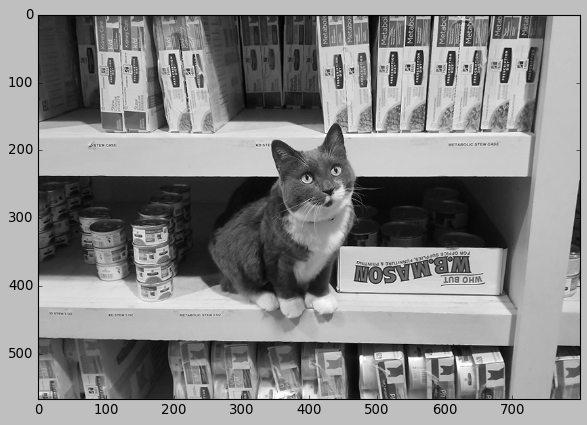

In [41]:
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
img = Image.open('test_svd.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [19]:
# extract the left singular vectors, the singular values and the right singular vectors
U, D, V = np.linalg.svd(imgmat)


In [20]:
# check the shape
imgmat.shape

(567, 800)

In [23]:
print(U.shape)
print(D.shape)
print(V.shape)

(567, 567)
(567,)
(800, 800)


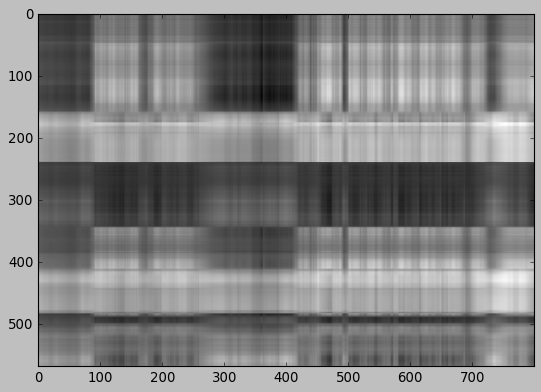

In [27]:
# D are the singular values that need to be put into a diagonal matrix. V doesn’t need to be transposed.
# we have reconstructed the 567px by 800px image from two singular values.

# We can reconstruct an image from a certain number of singular values. 
# For instance for 2 singular values we will have:

reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(reconstimg, cmap='gray')
plt.show()

With only two singular values and singular vectors. 
But we already see something!

We will now draw the reconstruction using different number of singular values.

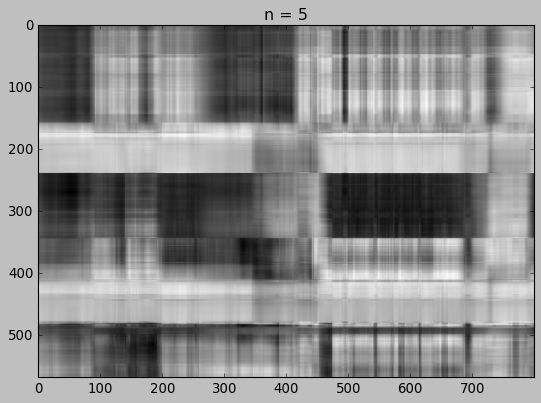

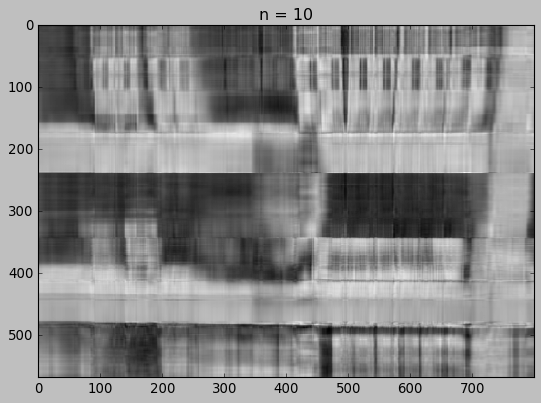

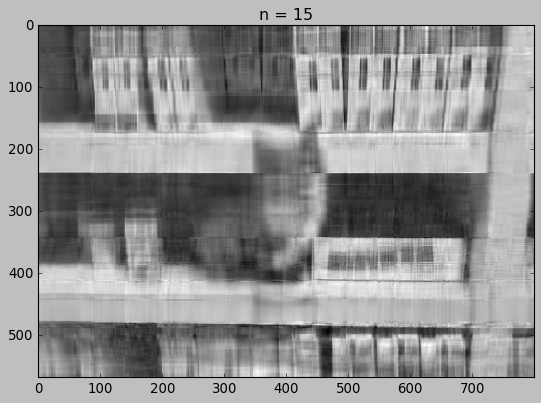

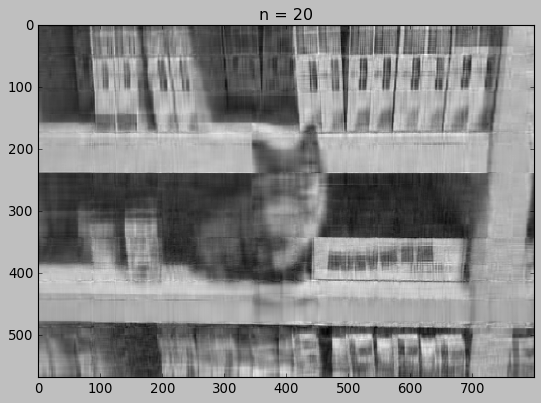

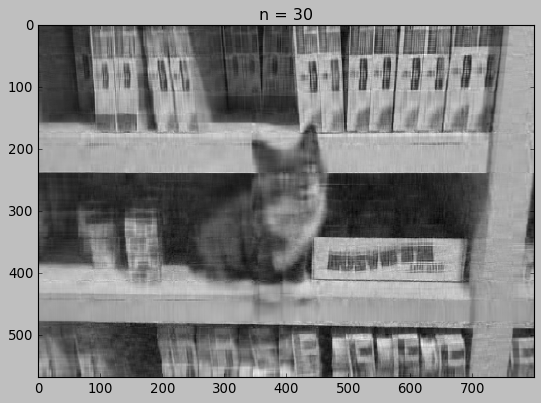

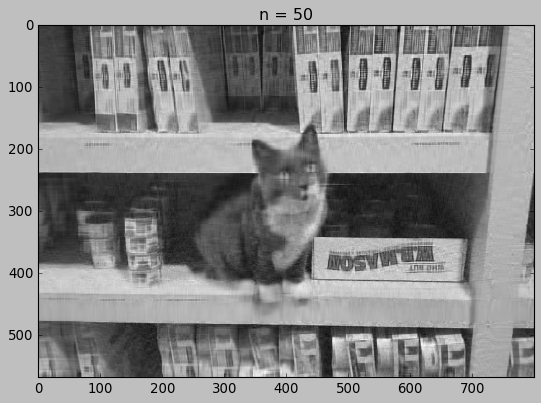

In [35]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()